In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import Counter
import ipywidgets as widgets
from ipywidgets import interact
from collections import Counter

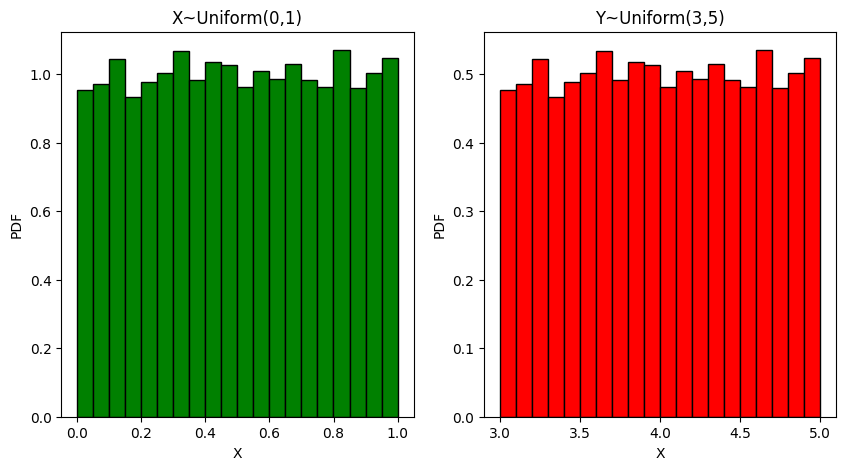

Mean of X is 0.5
Mean of Y is 4.0
Variance of X is 0.08
Variance of Y is 0.33


In [3]:
X = torch.distributions.Uniform(0,1)
samples_X = X.sample((10000,))
samples_Y = 2*samples_X+3
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(samples_X,bins=20,edgecolor='k',color='green',density=True)
ax[0].set_xlabel("X")
ax[0].set_ylabel("PDF")
ax[0].set_title(f"X~Uniform(0,1)")

ax[1].hist(samples_Y,bins=20,edgecolor='k',color='red',density=True)
ax[1].set_xlabel("X")
ax[1].set_ylabel("PDF")
ax[1].set_title(f"Y~Uniform(3,5)")
plt.show()
print("Mean of X is",round(torch.mean(samples_X).item(),2))
print("Mean of Y is",round(torch.mean(samples_Y).item(),2))
print("Variance of X is",round(torch.var(samples_X).item(),2))
print("Variance of Y is",round(torch.var(samples_Y).item(),2))

In [ ]:
X = torch.distributions.Uniform(0,1)
samples_X = X.sample((10000,))
samples_Y = -torch.log(samples_X)
plt.hist(samples_Y,bins=20,edgecolor='k',color='green',alpha=0.5,label='-ln(Uniform(0,1))',density = True)
lamda=0.5
exp = torch.distributions.Exponential(lamda)
samples = exp.sample((10000,))
plt.hist(samples.numpy(),bins=20,edgecolor='k',color='orange',alpha=0.5,label='Exponential(λ=0.5)',density = True)
plt.title('Comparison of -ln(Uniform(0,1)) and Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

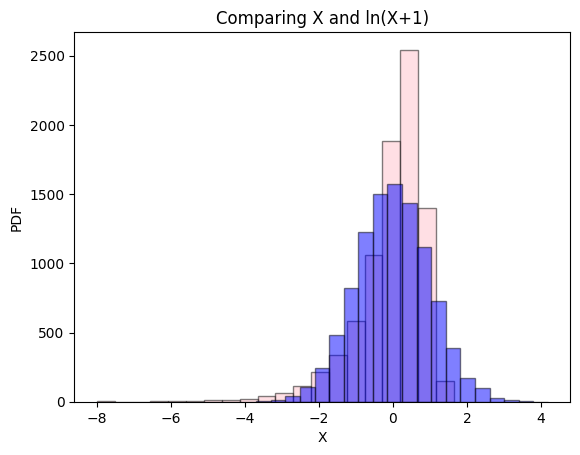

In [4]:
X = torch.distributions.Normal(0,1)
samples_X = X.sample((10000,)) 
samples_Y = torch.log(samples_X+1)
plt.hist(samples_Y,edgecolor='k',color='pink',bins=20,alpha=0.5)
plt.hist(samples_X,edgecolor='k',color='blue',bins=20,alpha=0.5)
plt.xlabel("X")
plt.ylabel("PDF")
plt.title("Comparing X and ln(X+1)")
plt.show()


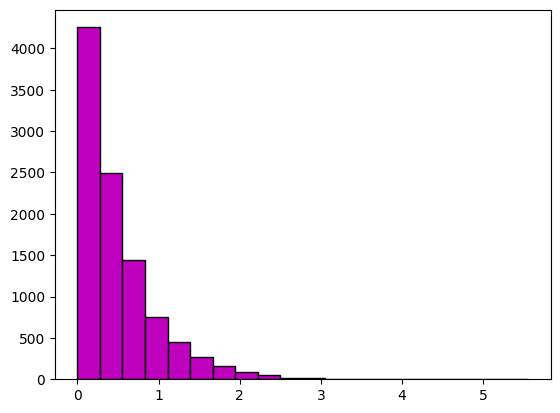

In [5]:
uniform = torch.distributions.Uniform(0,1)
samples = uniform.sample((10000,))
lamda = 2
exp = -torch.log(1-samples)/lamda
plt.hist(exp,bins=20,edgecolor='k',color='m')
plt.show()

In [6]:
def generate_exponential_random_variable(lam):
    U = torch.distributions.Uniform(0, 1).sample((1,))
    X = - (1 / lam) * torch.log(1 - U)
    return X

lambda_param = 3
exponential_random_variable = generate_exponential_random_variable(lambda_param)
print("Generated Exponential Random Variable:", round(exponential_random_variable.item(),2))

Generated Exponential Random Variable: 0.14


In [9]:
def analyze_exponential_samples(N, t, lambda_=5):
    exp_dist = torch.distributions.Exponential(rate=lambda_)
    X = exp_dist.sample((N,))
    
    Z = X ** 2
    
    proportion_exceeding_t = torch.mean((Z > t).float()).item() 
    mean_X, var_X = torch.mean(X).item(), torch.var(X, unbiased=True).item() 
    mean_Z, var_Z = torch.mean(Z).item(), torch.var(Z, unbiased=True).item() 
    
    return {
        "proportion_exceeding_t": proportion_exceeding_t,
        "mean_X": mean_X,
        "variance_X": var_X,
        "mean_Z": mean_Z,
        "variance_Z": var_Z
    }


N = 10000 
t = 0.1  
results = analyze_exponential_samples(N, t)
print(results)

{'proportion_exceeding_t': 0.2092999964952469, 'mean_X': 0.19934450089931488, 'variance_X': 0.039069704711437225, 'mean_Z': 0.07880403101444244, 'variance_Z': 0.028532247990369797}
